# Preparacion de los datos

In [27]:
# Bibliotecas para Manipulación de Datos y Análisis
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Operaciones del sistema operativo
import os

# Preprocesamiento y Escalado
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, RobustScaler, StandardScaler

In [28]:
# Configuro los parámetros iniciales de matplotlib para estandarizar los gráficos
params = {
    'figure.figsize': (16, 10),  # Establezco el tamaño de cada gráfico
    'figure.dpi': 80,  # Configuro la resolución por pulgada
    'figure.facecolor': 'white',  # Defino el color de fondo
    'figure.edgecolor': 'white',  # Defino el color del borde
    'figure.frameon': True,  # Mantengo el borde del gráfico activado
    'figure.constrained_layout.use': False,  # Desactivo el diseño restringido para las figuras
    'figure.constrained_layout.h_pad': 0.04167,  # Espaciado horizontal en el diseño restringido
    'figure.constrained_layout.w_pad': 0.04167,  # Espaciado vertical en el diseño restringido
    'axes.labelsize': 12,  # Establezco el tamaño de las etiquetas de los ejes
    'axes.titlesize': 14,  # Establezco el tamaño del título
    'axes.labelweight': 'normal',  # Configuro el grosor de la fuente de las etiquetas
    'xtick.labelsize': 10,  # Defino el tamaño de las etiquetas del eje x
    'ytick.labelsize': 10,  # Defino el tamaño de las etiquetas del eje y
    'xtick.color': 'black',  # Configuro el color de las etiquetas del eje x
    'ytick.color': 'black',  # Configuro el color de las etiquetas del eje y
    'axes.spines.top': True,  # Mantengo visible el borde superior del gráfico
    'axes.spines.right': True,  # Mantengo visible el borde derecho del gráfico
    'legend.frameon': True,  # Mantengo visible el marco de la leyenda
    'grid.linestyle': '-',  # Defino el estilo de las líneas de la cuadrícula
    'grid.linewidth': 0.8,  # Configuro el grosor de las líneas de la cuadrícula
    'grid.color': 'gray',  # Establezco el color de las líneas de la cuadrícula
    'legend.fontsize': 10,  # Configuro el tamaño de la fuente de la leyenda
    'axes.titleweight': 'normal',  # Establezco el grosor de la fuente del título
    'axes.titlecolor': 'black',  # Configuro el color del título
    'axes.titlelocation': 'center',  # Coloco el título en el centro del gráfico
}

# Actualizo los parámetros de Matplotlib con la configuración establecida
plt.rcParams.update(params)

# Aplico el tema de tableau
plt.style.use('tableau-colorblind10')

# Activo la visualización de gráficos en línea (dentro de la celda de código)
%matplotlib inline

### Funcion para renombramiento de columnas

**snake_case**

In [29]:
def snake_case(column_name):
    column_name = column_name.lower()
    column_name = column_name.replace(' ', '_')
    return column_name

**Eliminar signos extraños**

In [30]:
def clean_signs(column_name, list_signs):
    for sign in list_signs:
        column_name = column_name.replace(sign, '')
    return column_name

**Texto a minusculas**

In [50]:
def text_to_lower(column):
    column = column.str.lower()
    return column

## Lectura de csv

In [31]:
df_path = '../data/bronze/shopping_behavior_updated.csv'
df = pd.read_csv(df_path)

In [32]:
# creo una copia del dataframe original que almacenare en un nuevo df de procesamiento
df_procesado = df.copy()

In [33]:
df_procesado.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


## Limpieza

### Valores nulos

Deteccion y visualizacion

In [34]:
# lista con convenciones de valores nulos en strings

common_na_strings = ["faltante", "NA", "N A", "N/A", "#N/A", "NA ", " NA", "N /A", "N / A", " N / A",
                     "N / A ", "na", "n a", "n/a", "na "," na", "n /a", "n / a", " a / a", "n / a ",
                     "NULO", "nulo", "", "?", "*", ".", " ", "  ", "-", "--", "---", "----", 
                     "MISSING", "Missing", "missing", "NULL", "null", "Null", "none", "None", "NONE",
                     "NaN", "nan", "NAN", "UNDEFINED", "undefined", "Undefined", "UNKNOWN", "unknown", 
                     "Unknown", "NOT AVAILABLE", "not available", "Not Available", "NOT APPLICABLE", 
                     "not applicable", "Not Applicable", "NOT GIVEN", "not given", "Not Given", 
                     "NOT RECORDED", "not recorded", "Not Recorded", "EMPTY", "empty", "Empty", 
                     "BLANK", "blank", "Blank", "NO DATA", "no data", "No Data", "-999", "-9999", 
                     "-1", "none available", "none provided", "not provided", "unavailable", 
                     "no value", "not specified", "unlisted", "no entry"]

In [35]:
# remplazo las posibles convenciones de valores nulos dentro del dataframe, por valores nulos np.nan detectados por numpy
df_procesado = df_procesado.replace(
    to_replace=common_na_strings,
    value=np.nan
)

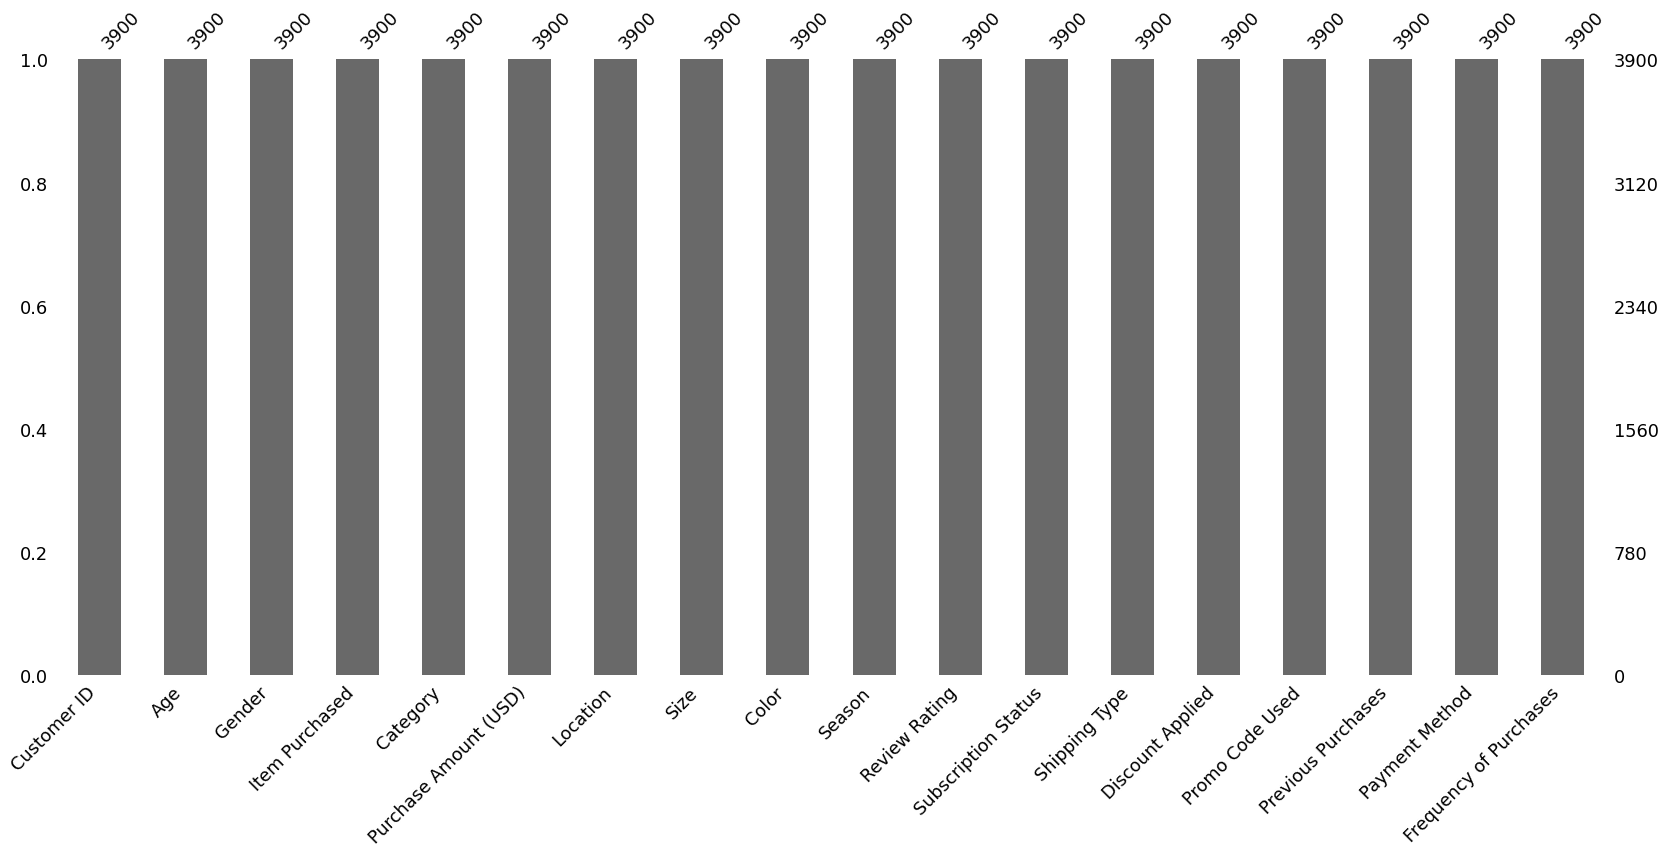

In [36]:
msno.bar(df_procesado)
plt.show()

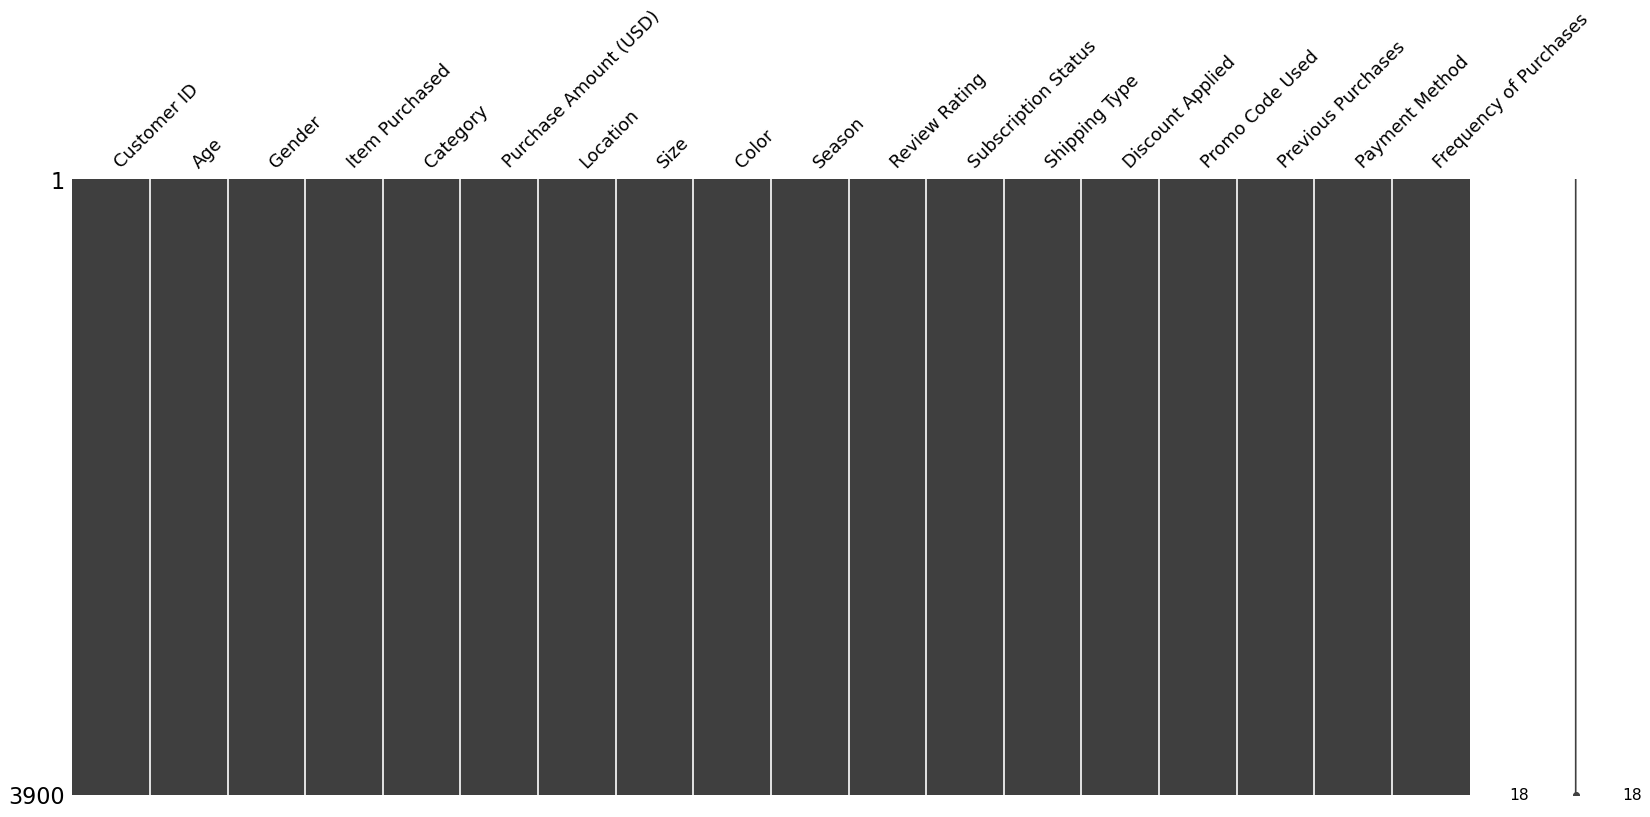

In [37]:
msno.matrix(df_procesado)
plt.show()

In [53]:
df_procesado.isnull().sum().sum()

0

### Obvervacion de esta sub-etapa:

- Agregar aqui -

## Ingenieria de caracteristicas

In [39]:
df_procesado.sample(4)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
1959,1960,46,Male,Shoes,Footwear,90,Colorado,M,White,Fall,3.1,No,Store Pickup,No,No,7,Credit Card,Every 3 Months
2758,2759,32,Female,Blouse,Clothing,98,Illinois,M,Purple,Summer,3.2,No,Standard,No,No,8,Bank Transfer,Bi-Weekly
2868,2869,45,Female,Backpack,Accessories,49,Colorado,M,Black,Winter,2.6,No,Next Day Air,No,No,42,PayPal,Every 3 Months
2590,2591,57,Male,Gloves,Accessories,66,California,M,Turquoise,Summer,5.0,No,Free Shipping,No,No,35,Venmo,Annually


In [75]:
df_procesado.dtypes

customer_id                  Int64
age                          Int64
gender                    category
item_purchased            category
category_item             category
purchase_amount_usd          Int64
location                  category
size                      category
color                     category
season                    category
review_rating              Float64
subscription_status       category
shipping_type             category
discount_applied          category
promo_code_used           category
previous_purchases           Int64
payment_method            category
frequency_of_purchases    category
dtype: object

### Nombres de columnas

In [73]:
df_procesado.rename(columns={'category':'category_item'}, inplace=True)

#### Estandarizacion nombramiento de columnas

In [56]:
list_signs = ['(', ')']
columns = df_procesado.columns

In [57]:
columns = list(map(snake_case, columns))
columns = list(map(lambda col: clean_signs(column_name=col, list_signs=list_signs), columns))

In [58]:
df_procesado.columns = columns

### Estandarizacion de valores tipo texto

In [51]:
df_procesado[df_procesado.select_dtypes(exclude='number').columns] = df_procesado[df_procesado.select_dtypes(exclude='number').columns].apply(text_to_lower)

### Estandarizacion de tipos de datos

In [66]:
df_procesado = df_procesado.convert_dtypes(infer_objects=True)

**Datos cualitativos: nominales u ordinales**

In [134]:
df_procesado.loc[df_procesado['frequency_of_purchases']=='every 3 months', 'frequency_of_purchases'] = 'quarterly'
df_procesado.loc[df_procesado['frequency_of_purchases']=='fortnightly', 'frequency_of_purchases'] = 'bi-weekly'

In [101]:
no_numbers_columns = df_procesado.select_dtypes(exclude='number').columns 
df_procesado[no_numbers_columns] = df_procesado[no_numbers_columns].astype('category')

In [103]:
unique_values_counts = df_procesado[no_numbers_columns].nunique()
mean_unique_values_counts = np.mean(unique_values_counts)

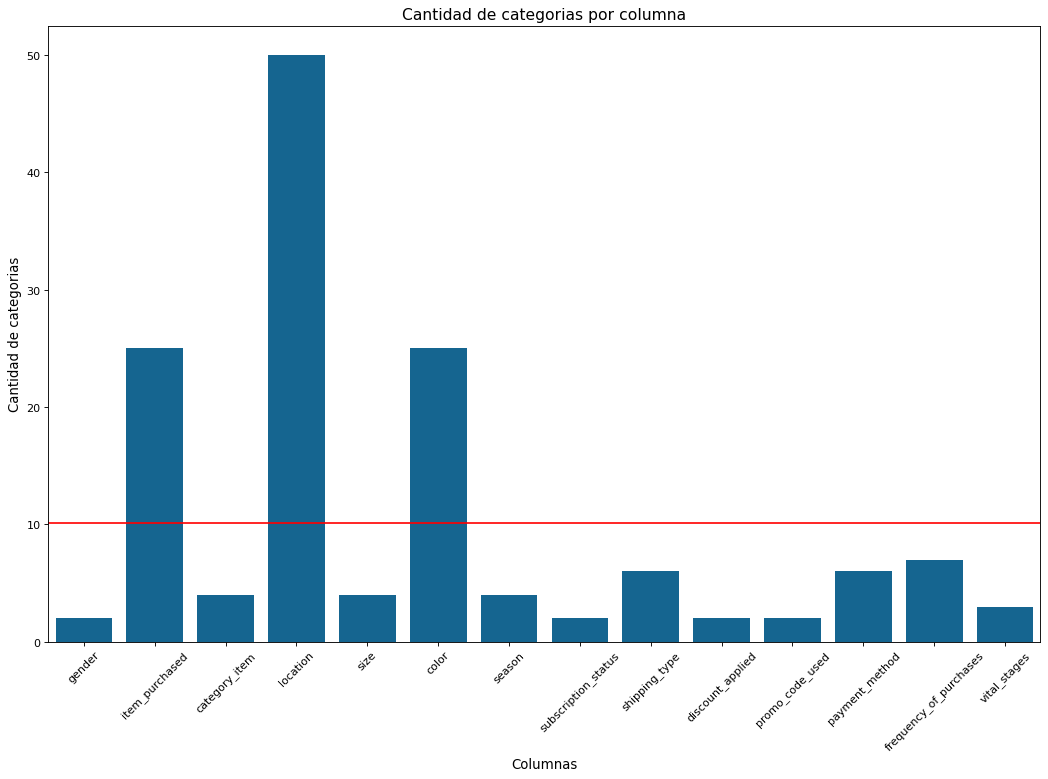

In [109]:
sns.barplot(x=unique_values_counts.index, y=unique_values_counts.values)
plt.title('Cantidad de categorias por columna')
plt.axhline(mean_unique_values_counts, color='red')
plt.xlabel('Columnas')
plt.xticks(rotation=45)
plt.ylabel('Cantidad de categorias')
plt.show()

**Datos cuantitativos**

Rangos o clases

In [76]:
bins = [0, 10, 12, 20, 60, 80, 110]
labels = ["niño", "preadolescente", "adolescente", "adulto", "tercera_edad", "cuarta_edad"]

df_procesado['vital_stages'] = pd.cut(df_procesado['age'], bins=bins, labels=labels, right=False)

### Codificacion de datos

Variables categoricas ordinales

In [137]:
df_variables_ordinales_escaladas = pd.DataFrame({})

In [145]:
# Definir un diccionario con las categorías en orden

categorias_ordenadas = {
    'size': ['s', 'm', 'l', 'xl'],
    'subscription_status': ['no', 'yes'],
    'discount_applied': ['no', 'yes'],
    'promo_code_used': ['no', 'yes'],
    'frequency_of_purchases': ['weekly', 'bi-weekly', 'monthly', 'quarterly', 'annually'],
    'vital_stages': ['adolescente', 'adulto', 'tercera_edad'],
    'season': ['winter', 'spring', 'summer', 'fall']
}

# Configurar el codificador con las categorías en el orden especificado
ordinal_encoder = OrdinalEncoder(categories=list(categorias_ordenadas.values()))

# Aplicar el codificador a las columnas y asignar los resultados a nuevas columnas
columnas_codificadas = [f"{col}_encoded" for col in categorias_ordenadas.keys()]
df_variables_ordinales_escaladas[columnas_codificadas] = ordinal_encoder.fit_transform(df_procesado[list(categorias_ordenadas.keys())])

In [146]:
df_variables_ordinales_escaladas.sample(2)

,size_encoded,subscription_status_encoded,discount_applied_encoded,promo_code_used_encoded,frequency_of_purchases_encoded,vital_stages_encoded,season_encoded
1230,2.0,0.0,1.0,1.0,2.0,1.0,1.0
3585,3.0,0.0,0.0,0.0,1.0,1.0,0.0


Variables categoricas nominales

In [148]:
columnas_categoricas_nominales = df_procesado.select_dtypes(include='category').columns
columnas_categoricas_nominales = [col for col in columnas_categoricas_nominales if col not in categorias_ordenadas.keys()]

In [149]:
df_variables_nominales_escaladas = pd.DataFrame({}, columns=columnas_categoricas_nominales)

In [150]:
# Inicializar el codificador
label_encoders = {col: LabelEncoder() for col in columnas_categoricas_nominales}

# Aplicar el codificador a las columnas nominales
for col in columnas_categoricas_nominales:
    df_variables_nominales_escaladas[col] = label_encoders[col].fit_transform(df_procesado[col])

In [151]:
df_variables_nominales_escaladas.sample(2)

,gender,item_purchased,category_item,location,color,shipping_type,payment_method
691,1,0,0,20,19,4,4
1958,1,18,1,27,7,5,1


### Escalamiento de datos

In [152]:
df_columnas_numericas = df_procesado.select_dtypes(include=['number'])

In [153]:
# Escalar las variables numéricas
scaler = RobustScaler()
variables_numericas_escaladas = scaler.fit_transform(df_columnas_numericas)
df_numerico_escalado = pd.DataFrame(variables_numericas_escaladas, columns=df_columnas_numericas.columns)

In [154]:
# Concatenar los DataFrames
df_estandarizado_escalado = pd.concat([df_numerico_escalado, df_variables_ordinales_escaladas, df_variables_nominales_escaladas], axis=1)

# Crear el diccionario de renombramiento
nombres_actuales = df_estandarizado_escalado.columns
nuevos_nombres = (df_numerico_escalado.columns.tolist() +
                   df_variables_ordinales_escaladas.columns.tolist() +
                   df_variables_nominales_escaladas.columns.tolist())
renombramiento = dict(zip(nombres_actuales, nuevos_nombres))

df_estandarizado_escalado.rename(columns=renombramiento, inplace=True)

In [155]:
df_estandarizado_escalado.sample(2)

,customer_id,age,purchase_amount_usd,review_rating,previous_purchases,size_encoded,subscription_status_encoded,discount_applied_encoded,promo_code_used_encoded,frequency_of_purchases_encoded,vital_stages_encoded,season_encoded,gender,item_purchased,category_item,location,color,shipping_type,payment_method
269,-0.862016,0.923077,-0.380952,-0.307692,-0.64,1.0,1.0,1.0,1.0,1.0,2.0,0.0,1,2,1,9,4,3,1
3095,0.587587,0.692308,-0.166667,-0.230769,-0.48,0.0,0.0,0.0,0.0,1.0,2.0,3.0,0,8,0,22,0,4,5


### Guardado de datos procesados

In [156]:
# guardo los dataframes procesados y escalados en la carpeta "silver"
path_df_procesado = '../data/silver/df_procesado.csv'
df_procesado.to_csv(path_df_procesado, index=False)

path_csv_estandarizado_escalado = '../data/silver/df_estandarizado_escalado.csv'
df_estandarizado_escalado.to_csv(path_csv_estandarizado_escalado, index=False)